<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

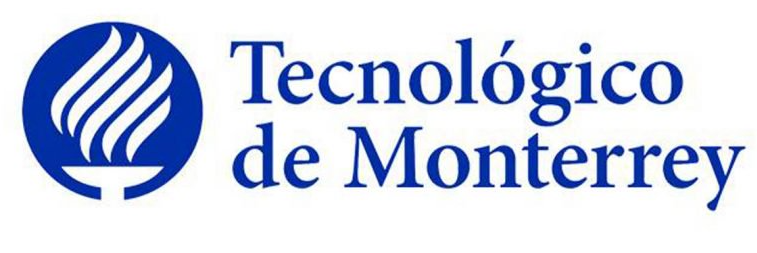

# **Ciencia y analítica de datos**
**Actividad Semanal - 11 Octubre  de 2022**

**Jobish Vallikavungal Devassia - Maricarmen Vázquez Rojí**



*   Fernando Acevedo Ortegate - A01794022   



## **Parte 1: Ejercicio guiado**



**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**
* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [187]:
# Guardar dataframe, poner nombre a las columnas.

df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.columns = ['NT_dollar','Gender','Education ','Marital status','Age ','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
              'Bill_statament_Sep','Bill_statament_Aug','Bill_statament_Jul','Bill_statament_Jun','Bill_statament_May','Bill_statament_Apr',
              'prev_payment_Sep','prev_payment_Aug','prev_payment_Jul','prev_payment_Jun','prev_payment_May','prev_payment_Apr','Y']
df.head(10)

,NT_dollar,Gender,Education,Marital status,Age,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,...,Bill_statament_Jun,Bill_statament_May,Bill_statament_Apr,prev_payment_Sep,prev_payment_Aug,prev_payment_Jul,prev_payment_Jun,prev_payment_May,prev_payment_Apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


In [188]:
# Ver infomacion detallada del "df"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NT_dollar           30000 non-null  int64  
 1   Gender              29999 non-null  float64
 2   Education           29998 non-null  float64
 3   Marital status      29998 non-null  float64
 4   Age                 29995 non-null  float64
 5   past_pay_Apr        29997 non-null  float64
 6   past_pay_May        29995 non-null  float64
 7   past_pay_Jun        29993 non-null  float64
 8   past_pay_Jul        29991 non-null  float64
 9   past_pay_Aug        29984 non-null  float64
 10  past_pay_Sep        29986 non-null  float64
 11  Bill_statament_Sep  29989 non-null  float64
 12  Bill_statament_Aug  29989 non-null  float64
 13  Bill_statament_Jul  29987 non-null  float64
 14  Bill_statament_Jun  29985 non-null  float64
 15  Bill_statament_May  29983 non-null  float64
 16  Bill

In [189]:
# Agrupar y reducir filas

df.dropna(inplace = True)
df.isna().values.any()
df

,NT_dollar,Gender,Education,Marital status,Age,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,...,Bill_statament_Jun,Bill_statament_May,Bill_statament_Apr,prev_payment_Sep,prev_payment_Aug,prev_payment_Jul,prev_payment_Jun,prev_payment_May,prev_payment_Apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [190]:
# Visualizar las dimensiones del df

print('La cantidad de columnas es: ', df.shape[1])
print('La cantidad de filas es: ', df.shape[0])

La cantidad de columnas es:  24
La cantidad de filas es:  29958


In [191]:
# Eliminar variables cualitativas

df2 = df.drop(['Gender','Education ','Marital status','Age ','Y'], axis=1) 
df2


,NT_dollar,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,past_pay_Sep,Bill_statament_Sep,Bill_statament_Aug,Bill_statament_Jul,Bill_statament_Jun,Bill_statament_May,Bill_statament_Apr,prev_payment_Sep,prev_payment_Aug,prev_payment_Jul,prev_payment_Jun,prev_payment_May,prev_payment_Apr
ID,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [192]:
# Organizar en orden temporal

df2 = df2.reindex(columns=['NT_dollar','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
    'Bill_statament_Apr','Bill_statament_May','Bill_statament_Jun','Bill_statament_Jul','Bill_statament_Aug','Bill_statament_Sep',
    'prev_payment_Apr','prev_payment_May','prev_payment_Jun','prev_payment_Jul','prev_payment_Aug','prev_payment_Sep'])
df2.head(10)

,NT_dollar,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,past_pay_Sep,Bill_statament_Apr,Bill_statament_May,Bill_statament_Jun,Bill_statament_Jul,Bill_statament_Aug,Bill_statament_Sep,prev_payment_Apr,prev_payment_May,prev_payment_Jun,prev_payment_Jul,prev_payment_Aug,prev_payment_Sep
ID,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0
2,120000,-1.0,2.0,0.0,0.0,0.0,2.0,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0
3,90000,0.0,0.0,0.0,0.0,0.0,0.0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
4,50000,0.0,0.0,0.0,0.0,0.0,0.0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
5,50000,-1.0,0.0,-1.0,0.0,0.0,0.0,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0
6,50000,0.0,0.0,0.0,0.0,0.0,0.0,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0
7,500000,0.0,0.0,0.0,0.0,0.0,0.0,473944.0,483003.0,542653.0,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0
8,100000,0.0,-1.0,-1.0,0.0,0.0,-1.0,567.0,-159.0,221.0,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0
9,140000,0.0,0.0,2.0,0.0,0.0,0.0,3719.0,11793.0,12211.0,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0


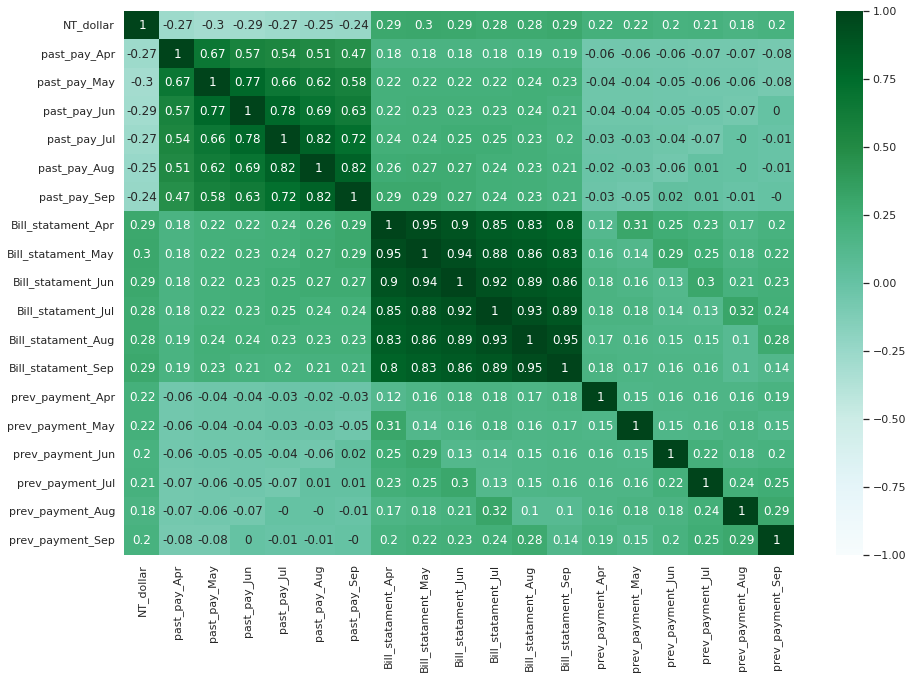

In [193]:
# Crear matriz de correlacion

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df2.corr().round(2), cmap="BuGn", annot=True, vmin=-1, vmax=1) 

In [194]:
pcs = PCA()

pcs.fit(df2)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]

pcsSummary.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,2.0628,0.9387,0.7321,0.5963,0.512,0.4186
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000


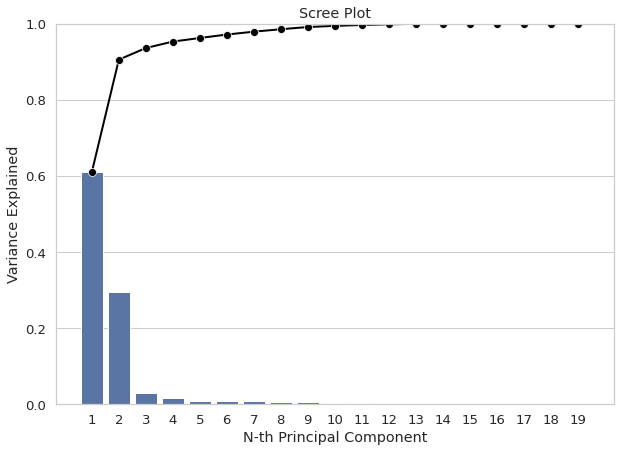

In [195]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

**Paso 2: Interprete cada componente principal en términos de las variables originales**
* Examine la magnitud y la dirección de los coeficientes de las variables originales.
* Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [196]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = df2.columns
                                )
pcsComponents_df.iloc[:,:19].round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
NT_dollar,0.4911,0.8693,-0.0206,-0.0184,-0.0441,0.0169,-0.0011,0.0010,0.0095,0.0038,0.0058,0.0000,0.0019,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
past_pay_Apr,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.3272,-0.6286,-0.6308,0.2800,-0.1439,-0.0280
past_pay_May,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.4158,-0.4361,0.2838,-0.5808,0.4548,0.1104
past_pay_Jun,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.4421,-0.1177,0.5643,0.1453,-0.6224,-0.2526
past_pay_Jul,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.4421,0.2324,0.1547,0.5754,0.3266,0.5374
past_pay_Aug,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.4180,0.3883,-0.1965,0.0471,0.3470,-0.7164
past_pay_Sep,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.3930,0.4427,-0.3749,-0.4794,-0.3976,0.3480
Bill_statament_Apr,0.3087,-0.1672,0.4837,-0.3084,0.2269,0.3918,0.0768,-0.2629,-0.1055,0.2368,0.2031,-0.1585,0.3662,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
Bill_statament_May,0.3230,-0.1766,0.4281,-0.2001,-0.0158,-0.0783,-0.0134,0.4801,0.1265,0.1010,-0.0525,0.0924,-0.6055,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
Bill_statament_Jun,0.3465,-0.1938,0.2610,0.0791,-0.3679,-0.4732,-0.1782,-0.2277,-0.0974,-0.1369,-0.3749,0.2335,0.3189,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000


In [197]:
pcsComponents_df.abs().idxmax()

PC1              NT_dollar
PC2              NT_dollar
PC3     Bill_statament_Sep
PC4       prev_payment_Aug
PC5       prev_payment_Jun
PC6       prev_payment_Jul
PC7       prev_payment_Sep
PC8       prev_payment_May
PC9       prev_payment_Apr
PC10      prev_payment_Jun
PC11      prev_payment_Jul
PC12    Bill_statament_Aug
PC13    Bill_statament_May
PC14          past_pay_Jun
PC15          past_pay_Apr
PC16          past_pay_Apr
PC17          past_pay_May
PC18          past_pay_Jun
PC19          past_pay_Aug
dtype: object

**Paso 3: Identifique valores atípicos**
* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

<function matplotlib.pyplot.show(*args, **kw)>

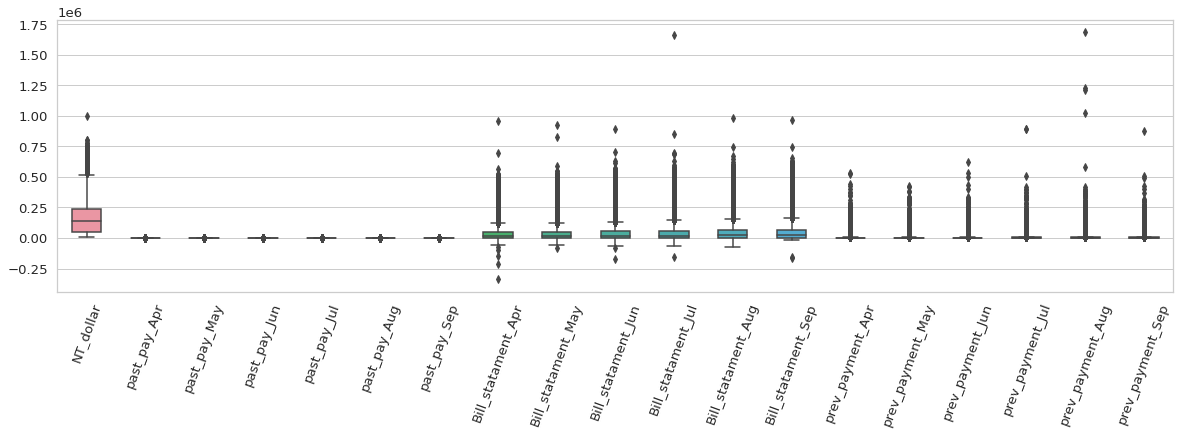

In [198]:
df_atipicos = df2.copy()
plt.figure(figsize = (20,5))
sns.boxplot(data = df_atipicos, width = 0.5)
plt.xticks(rotation = 70) 
plt.show

Los valores atipicos de gran medida se encuentran en el valor del credito, valor del credito en julio, abonos en agosto. En menor medida se ven valores atipicos en valores de credito desde junio hasta septiembre, abonos en agosto y julio.

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook



1.   **¿Cuál es el número de componentes mínimo y por qué?**
 El numero de componente minimo es diecinueve ya que se ha obtenido el promedio trimestras del tiempo de los pagos, los pago y los abonos hechos, ademas se conserva el valor total del credito. Se eliminan las variables de genero, educacion, estado civil y edad para proceder con el analisis del credito.

2.   **¿Cuál es la variación de los datos que representan esos componentes?**
* Se presenta una variacion del 61.06% realizando este tipo de agrupamiento. 

3.   **¿Cuál es la pérdida de información después de realizar PCA?**
* La perdida de informacion esta estimada para 90% en este tipo de agrupamiento

4.   **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
* la variable que menor importancia muestra es "past_pay_Aug" que corresponde a los meses acumulados previos al pago. Es decir los meses abonados. Para este analisis tiene un rango bajo, de 1 a 8, al ser enteros de bajo rango muestan el valor por lo cual las variables similares se encuentran de ultimo. Un variable original mas acertada que involucra el credito es "Bill_statament_May" que infica el estado de cuenta en mayo. 

5.   **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
* Es recomendado usar PCA cuando el dataset tiene una gran cantidad de variables que se deben analizar o se tiene variables que muestran una alta correlacion entre si, de acuerdo al diagrama de correlacion vemos que menos de una cuarta parte de este dataset muestra una correlacion entre sus variables.
